In [52]:
from Crypto.Util.number import *
flag_p1 = b"pwned{2_degree_isogeny_map}"
flag = 23231
class Curve():
    
    def __init__(self,p,a):
        self.p =p 
        self.a = a
        self.F = GF(p)
        
    def doubling(self,P1,P2):
        a  = self.a
        F = self.F
        ux1,uy1 = F(P1[0]),F(P1[1])
        ux2,uy2 = F(P2[0]),F(P2[1])

        ua = a
        ux3 = (((9)/((4)*uy1^2)*ux1^4+(9)/uy1^2*ua*ux1^3+((9)/uy1^2*ua^2+(9)/uy1^2*ua)*ux1^2+((18)/uy1^2*ua^2-(2))*ux1+((9)/uy1^2*ua^2-(3)*ua)))
        uy3 = ((-(27)/((8)*uy1^3)*ux1^6-(81)/((4)*uy1^3)*ua*ux1^5+(-(81)/((2)*uy1^3)*ua^2-(81)/((4)*uy1^3)*ua)*ux1^4+(-(27)/uy1^3*ua^3-(81)/uy1^3*ua^2+(9)/((2)*uy1))*ux1^3+(-(81)/uy1^3*ua^3-(81)/((2)*uy1^3)*ua^2+(27)/((2)*uy1)*ua)*ux1^2+(-(81)/uy1^3*ua^3+(9)/uy1*ua^2+(9)/uy1*ua)*ux1+(-(27)/uy1^3*ua^3+(9)/uy1*ua^2-uy1)))

        return (ux3,uy3)
        
    def add(self,P1,P2):
        if P1==P2:
            return self.doubling(P1,P2)
        a  = self.a
        F = self.F
        ux1,uy1 = F(P1[0]),F(P1[1])
        ux2,uy2 = F(P2[0]),F(P2[1])

        ua = a

        ux3 = (((-ux1^3+(ux2-(3)*ua)*ux1^2+(ux2^2+(6)*ua*ux2)*ux1+(uy1^2-(2)*uy2*uy1+(-ux2^3-(3)*ua*ux2^2+uy2^2)))/(ux1^2-(2)*ux2*ux1+ux2^2)))
        uy3 = ((((-uy1+(2)*uy2)*ux1^3+(-(3)*ua*uy1+(-(3)*uy2*ux2+(3)*ua*uy2))*ux1^2+(((3)*ux2^2+(6)*ua*ux2)*uy1-(6)*ua*uy2*ux2)*ux1+(uy1^3-(3)*uy2*uy1^2+(-(2)*ux2^3-(3)*ua*ux2^2+(3)*uy2^2)*uy1+(uy2*ux2^3+(3)*ua*uy2*ux2^2-uy2^3)))/(-ux1^3+(3)*ux2*ux1^2-(3)*ux2^2*ux1+ux2^3)))

        return (ux3,uy3)
    
    def map_to_im(self,R):
      x,y = R
      F= self.F
      u = F(x+4*a+12*a*F(x+1)/F(x^2))
      v =  F(y*(1-12*a*F(x+2)/F(x^3)))
      return (u,v)

    def map_to_t(self,R):
      x,y = R  
      F= self.F
      x,y = F(x),F(y)
      u = (x-12*a+(12*a*(4*a-9))/x-(4*a*(4*a-9)^2)/x^2)/F(3^2)
      v =y*(1-(12*a*(4*a-9))/x^2+(8*a*(4*a-9)^2)/x^3)/F(3^3)
      return (u,v)
    
   # left-to-right double-and-add
    def single_mul(self, e, P): 
        e = int(e)%(self.p) # a safety feature
        t = int(e).bit_length()
        if n == 0:
            return (0,1)
        R = P
        for i in range(t-2,-1,-1):
            bit = (e >> i) & 1
            R = self.add(R, R)
            R = self.map_to_t(self.map_to_im(R))
            if bit == 1:
                R = self.add(R, P)
        return (R[0], R[1]) 
    

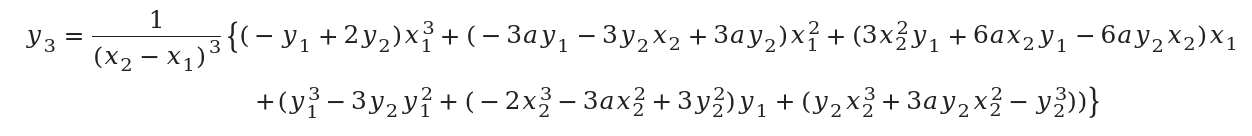

In [14]:
p=getPrime(256)
F= GF(p)
a = randint(1,p-1)
la = 1
R.<x,y> = PolynomialRing(F)
f = y^2-x^3-3*1*a*(x+1)^2 # figure this out with some googling :D
Ei = EllipticCurve(f)

gx = randint(0,p-1)
gy = F(-f.subs(x=gx,y=0)).sqrt()
gx,gy,f.subs(x=gx,y=gy),factor(Ei.order())

(4538014518171478169570927637841307805826273324858922011318229017298749842748,
 9406925018593164914898242685877200481874713178900876099567367668138278929212,
 0,
 2^2 * 3^3 * 5 * 7 * 43 * 149 * 229 * 7151 * 15313 * 110523502053248887533053282269377557970352265988607382178719)

In [1237]:
a = 7
la = 1
R.<x,y> = PolynomialRing(F)
f = y^2-x^3-3*1*a*(x+1)^2 # figure this out with some googling :D
Ei = EllipticCurve(f)
gx = randint(0,p-1)
gy = F(-f.subs(x=gx,y=0)).sqrt()
gx,gy,factor(Ei(gx,gy).order())

(36909926821025474084779583203077733580169516870096737521372030118162937737373,
 24173093890460607399355386695167495678336827636030130245952390931850444402169,
 3^3 * 5 * 3467 * 41927 * 51439 * 160409 * 4939320690081439 * 35347564158589598503946767282060076948563)

In [75]:
G = 3^3*G
C=Curve(p,a)
k = 19
P = C.single_mul(k,G)
o = Ei(P[0],P[1]).order()
di = pow(3^(int(k).bit_length()-1),-1,o)
G.discrete_log(Ei(P[0],P[1]))

1303

In [69]:
o = Ei(P[0],P[1]).order()
di = pow(3^(int(k).bit_length()-1),-1,o)
G.discrete_log(Ei(P[0],P[1]))

(31613115251251201933260761090317207647834128940382584475186824791713645898310 : 32559244941552420002542534387913503147457146052190526612174573508073229247652 : 1)

In [57]:
1296/16

81

In [62]:
3^4

81

In [17]:
 int(2^2 * 3^3 * 5 * 7 * 43 * 149 * 229 * 7151 * 15313).bit_length() 

60

In [38]:
G = Ei(gx,gy)
k = randint(0,2^2 * 3^3 * 5 * 7 * 43 * 149 * 229 * 7151* 2^3)
A = k*G
order = G.order()
max_val = 1<<int(k).bit_length()
subresults = []
factors = []
modulus = 1
for prime, exponent in factor(order):
    if modulus >= max_val: break
    _factor = prime ** exponent
    factors.append(_factor)
    G2 = G*(order//_factor)
    A2 = A*(order//_factor)
    subresults.append(discrete_log_lambda(A2, G2, (0,_factor), '+'))
    modulus *= _factor
crt(subresults,factors)

60782875434862

In [25]:
len(( 27641602025859).bits())

45

In [1113]:


G = (gx, gy)
C=Curve(p,a)
P = C.single_mul(4,G)
px,py=P

In [1106]:
Ei(G).discrete_log(Ei(P))

TypeError: Coordinates [21438458549649381520468100612631996127, 29234453740878825793760472425946060251, 1] do not define a point on Elliptic Curve defined by y^2 = x^3 + 15*x^2 + 30*x + 15 over Finite Field of size 46936161943751531991799616540470386131

In [1122]:
len(flag_p1)*8

216

In [1107]:
# Exploit 
t = 4 # number of bits
R.<x,y> = PolynomialRing(F)
f = y^2-x^3-3*1*a*(x+1)^2 # figure this out with some googling :D
Ei = EllipticCurve(f)
factor(Ei.order())

2 * 3^2 * 19 * 824839777409537 * 267502183519837039369

In [1067]:
def map_to_we(x,y):
    u = F(x+4*a+12*a*F(x+1)/F(x^2))
    v =  F(y*(1-12*a*F(x+2)/F(x^3)))
    return (u,v)
def map_to_s(x,y):
    x,y = F(x),F(y)
    u = (x-12*a+(12*a*(4*a-9))/x-(4*a*(4*a-9)^2)/x^2)/F(3^2)
    v =y*(1-(12*a*(4*a-9))/x^2+(8*a*(4*a-9)^2)/x^3)/F(3^3)
    return (u,v)
vx,vy=map_to_we(gx,gy)
R.<x,y> = PolynomialRing(F)
f = y^2-x^3-3*1*a*(x+1)^2
g = y^2-x^3+a*(3*x-4*a+9)^2
g.subs(x=vx,y=vy)

0

In [1068]:
map_to_s(vx,vy)

(38631309248334203280975291118616725349,
 11462058976975187449117306424422533217)

In [1072]:
Ei(G).discrete_log(Ei(map_to_s(vx,vy)))

3

In [1078]:
p3 = 3*Et((vx,vy))

Ei(G).discrete_log(Ei(map_to_s(p3[0],p3[1])))

9

In [1012]:
Ei = EllipticCurve(f)
Et = EllipticCurve((g))
Ei(G).j_invariant(),2*Ei(G).j_invariant()

AttributeError: 'EllipticCurvePoint_finite_field' object has no attribute 'j_invariant'

In [1031]:
R.<k,v>=PolynomialRing(GF(p))
(k^2-8).roots()

AttributeError: 'MPolynomial_polydict' object has no attribute 'roots'

(43190696471121214121895640626551675708,
 4890904764485438327984051320819572731,
 0)

In [1001]:
Ei.j_invariant()

4266923813068321090163601503679210841

In [868]:
# works ? 19709001508521098383042072000172634192
F(gy)

2702213722929133889608773437451268991

In [752]:
R.<x,y> = PolynomialRing(F)
f = y^2-x^3-3*la*a*(x+la)^2
g=f.subs(x=x-la*a,y=y)
J=Jacobian(f)
J((gx,gy))

TypeError: Coordinates [37259897633080985797738987736406777904, 17935277703683251063003201163836803459, 1] do not define a point on Elliptic Curve defined by y^2 = x^3 + 12626205044019898890411702524533550787*x + 2885387352949119149490223853058676120 over Finite Field of size 46936161943751531991799616540470386131

In [566]:
x,y = GF(p)['x,y'].gens()
Curve(x^3 + y^3)

TypeError: 'Curve' object is not callable

In [568]:
G

(4587676992944002776340520773270289863, 97091413839694209930495556630658133)

In [291]:

R.<ua,ux1,uy1,ux2,uy2> = PolynomialRing(QQ,5,order='invlex')
I = R.ideal([
  mynumerator((uy1^2)-(ux1^3+3*ua*(ux1+1)^2))
, mynumerator((uy2^2)-(ux2^3+3*ua*(ux2+1)^2))
])

J = I + R.ideal([0
, ux1-ux2
, uy1-uy2
])


In [878]:
F = GF(p)
R.<a> = PolynomialRing(F, implementation='NTL')

c =5
d = 213

j = F(6912*c^3)/F(4*c^3+27*d^2)
ff=6912*a*(a-2)^3-int(j)*(4*a-9)
a=ff.roots()[0][0]

la=F(-3*d*(a-2))/F(c*(2*a^2-6*a+3))
R.<x,y> = PolynomialRing(F)
f = y^2-x^3-3*la*a*(x+la)^2
g=f.subs(x=x-la*a,y=y)
f,-g

(-x^3 + 38730680561449929418290116591228944824*x^2 + y^2 + 21609843198098656090750213890213055051*x + 27102438383743719150172347115210837300,
 x^3 - y^2 + 5*x + 213)

In [879]:
E=EllipticCurve(f)
G=E.lift_x(F(gx))
C=Curve(p,a)
P = C.single_mul(66,(gx,G[1]))
66*G,P

((12021417267642878665941246813356799880 : 25267703767553967760338634037862060456 : 1),
 (41458506074491050937289675299013539019,
  1682767089747042904221852839060488964))

(12304468025792603559348586819087958649001017913610585964781423874459045896443755654476003519745610316727252860854444597862211927734,
 5192112436197435409325339821286254639535993494833035015959887291961496849695189525854665410859472281801683224778148484585457466240,
 0)

In [888]:
GG=EllipticCurve(f)
GG((gx,gy))

(39666767466078302903119599975367034415 : 10484473763179311053878980595782209915 : 1)

In [891]:
C.single_mul(66,(gx,gy)),66*GG((gx,gy))

((46145484498269040212851252596137165730,
  44377932146488553479936946103155683896),
 (19982087467101191841345430801662981394 : 30896675522263640081509285419290081402 : 1))

In [689]:
iso = 

1728 0
864000/527 1
27000/19 2
864000/743 3
216000/233 4
34560/47 5
13500/23 6
864000/1823 7
216000/557 8
864000/2687 9
270 10
864000/3767 11
216000/1097 12
864000/5063 13
27000/181 14
34560/263 15
216000/1853 16
864000/8303 17
27000/289 18
864000/10247 19
8640/113 20
864000/12407 21
3375/53 22
864000/14783 23
216000/4013 24
6912/139 25
13500/293 26
864000/20183 27
216000/5417 28
864000/23207 29
1080/31 30
864000/26447 31
216000/7037 32
864000/29903 33
27000/991 34
34560/1343 35
216000/8873 36
864000/37463 37
13500/617 38
864000/41567 39
8640/437 40
864000/45887 41
3375/188 42
864000/50423 43
216000/13193 44
34560/2207 45
27000/1801 46
864000/60143 47
216000/15677 48
864000/65327 49
216/17 50
864000/70727 51
216000/18377 52
864000/76343 53
6750/619 54
34560/3287 55
216000/21293 56
864000/88223 57
13500/1427 58
864000/94487 59
8640/977 60
864000/100967 61
27000/3259 62
864000/107663 63
216000/27773 64
34560/4583 65
27000/3691 66
864000/121703 67
216000/31337 68
864000/129047 69
540/83 7

In [489]:
a =5
d=F(-3^-1*(a-2)^-1*a*(2*a^2-6*a+3))
F(-3*d*(a-2))/F(a*(2*a^2-6*a+3))

1

In [422]:
a1,ll,p

(10754074703103862349467663447137571582,
 41427191084543324884009149368537238074,
 46936161943751531991799616540470386131)